In [1]:
import gpxpy
import gpxpy.gpx

# Parsing an existing file:
# -------------------------

gpx_file = open('Baikal2019_Lunkas.gpx', encoding="utf8")

gpx = gpxpy.parse(gpx_file)

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))

latitude = []    
longitude = []
names = []
for waypoint in gpx.waypoints:
    latitude.append(waypoint.latitude)
    longitude.append(waypoint.longitude)
    names.append(waypoint.name)
    print('waypoint {0} -> ({1},{2})'.format(waypoint.name, waypoint.latitude, waypoint.longitude))

for route in gpx.routes:
    print('Route:')
    for point in route.points:
        print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))



waypoint ИСТОЧНИК2 -> (52.0084760338068,105.3697749786079)
waypoint ЛУНКА -> (51.98767080903053,105.32037447206676)
waypoint ЛУНКА 0 -> (51.98608445003629,105.32151457853615)
waypoint ЛУНКА 1 -> (52.01591497287154,105.37850498221815)
waypoint ЛУНКА 4 -> (52.01788103207946,105.393730038777)


In [2]:
longitude

[105.3697749786079,
 105.32037447206676,
 105.32151457853615,
 105.37850498221815,
 105.393730038777]

In [3]:
%pylab inline
import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
lat = latitude
lon = longitude

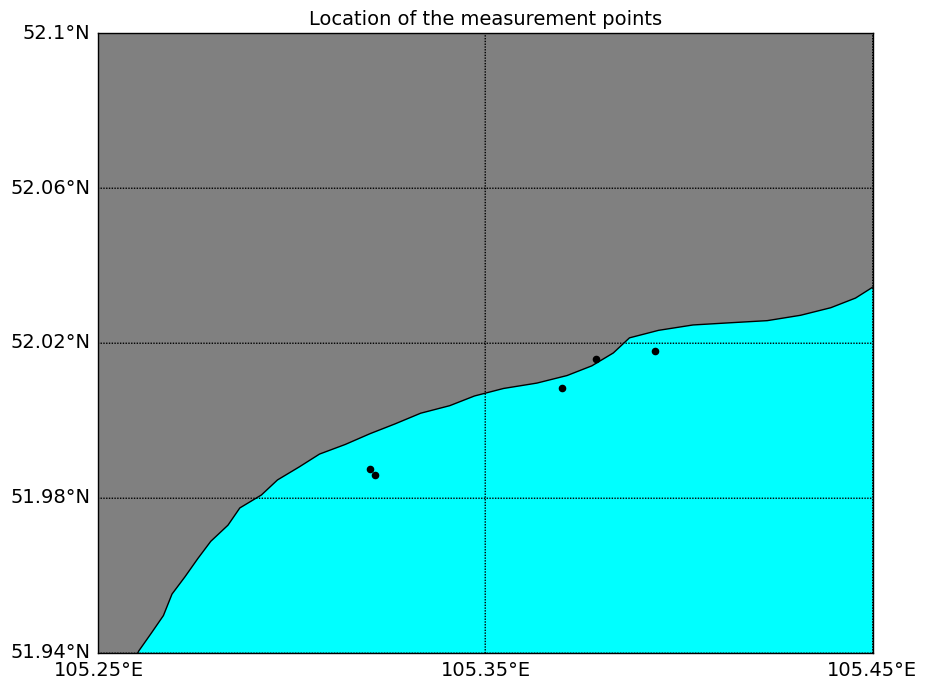

In [37]:
m = Basemap(projection='cyl',llcrnrlat=51.94,urcrnrlat=52.10,\
            llcrnrlon=105.25,urcrnrlon=105.45,resolution='f')
figsize(10,15)
 
x, y = m(lon,lat)
 
m.drawcoastlines()
m.fillcontinents(color='gray',lake_color='aqua')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(51.94, 52.10, .04),labels=[1,0,0,0], fontsize =14)
m.drawmeridians(np.arange(105.25, 105.45, .1),labels=[0,0,0,1], fontsize =14)
 
m.scatter(x,y,20,marker='o',color='k')
plt.title("Location of the measurement points", fontsize =14)
plt.show()

In [5]:
import folium

# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

print('Folium installed and imported!')

Folium installed and imported!


In [6]:
locationlist = list(zip(latitude, longitude))

In [34]:
baikal_map = folium.Map(
    location = [np.mean(latitude), np.mean(longitude)],    
    zoom_start = 12,
    tiles = 'Stamen Terrain'
)


for point in np.arange(1,len(locationlist)):
    baikal_map.add_child(
    folium.features.CircleMarker(locationlist[point], popup=names[point],  
        color = 'red', fill_color = 'Red'))
baikal_map.add_child(
    folium.features.CircleMarker(locationlist[0], popup=names[0],  
        color = 'Green', fill_color = 'Green'))

In [32]:
baikal_map

In [45]:
baikal_map.save('baikal_map.html')

In [46]:
# First, import the geodesic module from the geopy library 
from geopy.distance import geodesic as GD 
   
dist = []   
for g in np.arange(1,len(locationlist)):
    dist.append(GD(locationlist[g], locationlist[0]).km)
    print(f'Расстояние между {names[0]} и {names[g]} составляет {np.round(dist[g-1], 2)} км')

Расстояние между ИСТОЧНИК2 и ЛУНКА составляет 4.11 км
Расстояние между ИСТОЧНИК2 и ЛУНКА 0 составляет 4.15 км
Расстояние между ИСТОЧНИК2 и ЛУНКА 1 составляет 1.02 км
Расстояние между ИСТОЧНИК2 и ЛУНКА 4 составляет 1.95 км


In [47]:
dist

[4.107377506477501, 4.146576343722193, 1.0219513103437567, 1.9493974156942386]